<a href="https://drive.google.com/file/d/1-lmvLqHRoVztabnwQ8RbZuDhpsd1kmYY/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 1** for the course of *Selected Topics in Music and Acoustic Engineering* :

***Machine Learning for Audio and Acoustic Engineering***
---

* Student 1: Carmen Frieda Franci
* Student 2: Nicola Antonio Magno 

# **Before you start**

*   Go to "*File*" --> "*Save a copy in Drive*"
*   Open that copy (might open automatically)
*   Then continue below


**Import libraries**

* We need a number of libraries. Import them once to use throughout the document.

In [34]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
import librosa, librosa.display
import IPython

# **Lab 1: Basic Audio Processing in Python**

Python is a general-purpose programming language that is popular and easy to use. For new programmers, it is a great choice as a first programming language. In fact, more and more university CS departments are centering their introductory courses around Python.


#### **The Python Tutorial**

If you are new to Python, you can follow this [Python Tutorial](https://docs.python.org/3.8/tutorial/index.html).

For the purposes of this course, be sure you understand the following sections:

Section 3: *An Informal Introduction to Python*

*   numbers: int, float
*   strings
*   lists

Section 4: *More Control Flow Tools*

*   if statements
*   for statements
*   range
*   functions

Section 5: *Data Structures*

*   list comprehensions
*   tuples
*   dictionaries
*   looping techniques


Other resources:

*   [The Hitchhiker's Guide to Python](http://docs.python-guide.org/en/latest/)
*   [SciPy Lecture Notes](http://www.scipy-lectures.org/)
*   [SciPy Lecture Notes](http://www.scipy-lectures.org/)
*   [learnpython.org](https://www.learnpython.org/)


### **Exercise 1**: Basic operations with arrays

Use numpy to do the following array operations:

* Create a row vector v1: $[1,\, 2,\, 3]$ with shape (1,3)

In [35]:
v1 = np.array([[1, 2, 3]])

print("Shape of v1:", v1.shape)

Shape of v1: (1, 3)


Expected output:
```
(1, 3)
```

* Create a column vector v2:  $[1,\, 2,\, 3]^T$

In [36]:
v2 = np.array([[1], [2], [3]])

print("Shape of v2:", v2.shape)

Shape of v2: (3, 1)


Expected output:
```
(3, 1)
```

* Create a matrix M of 3 x 3 of random integer elements:

In [37]:
# Create a 3x3 matrix with random integer elements (range 0-9)
M = np.random.randint(0, 10, (3, 3))


* Show the first row of M:

In [38]:
# Show the first row of M
first_row = M[0, :]

# Print the first row
print("First row of M:", first_row)

First row of M: [2 4 8]


* Show the first column of M:

In [39]:
# Show the first row of M
first_column = M[:, 0]

# Print the first row
print("First column of M:", first_column)

First column of M: [2 3 3]


* Perform the matrix product v2 times v1:

In [40]:
# Perform the matrix product v2 times v1
matrix_product = v2 @ v1  

* Perform the matrix product v1 times v2:

In [41]:
# Perform the matrix product v1 * v2
product = np.dot(v1, v2)

* Perform the element-wise multiplication of v2 and v1, with result having the shape of v2:

In [42]:
# Perform element-wise multiplication of v2 and v1
elementwise_product = v2 * v1 

* Perform the element-wise multiplication of v1 and v2, with result having the shape of v1:

In [43]:
# Perform element-wise multiplication of v1 and v2
elementwise_product_v1 = v1 * v2.T  # Transpose v2 to match v1's shape

* Generate an array of 20 equally-spaced numbers between 0 and 10:

In [44]:
# Generate an array of 20 equally-spaced numbers between 0 and 10
array_linspace = np.linspace(0, 10, 20)
# Print the result
print("Array of equally-spaced numbers:\n", array_linspace)

Array of equally-spaced numbers:
 [ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


Expected output:
```
[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
```

* Generate an array of numbers going from 0 to 1.5 in steps of 0.2:

In [45]:
# Generate an array from 0 to 1.5 with step size 0.2
array_arange = np.arange(0, 1.6, 0.2)  # 1.6 to include 1.5 due to floating point precision

# Print the result
print("Array with step size 0.2:\n", array_arange)

Array with step size 0.2:
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4]


Expected output:
```
array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4])
```

* Generate an array of 13 logarithmically-spaced numbers between 1 and 2 (both included) using the numpy function logspace()

In [46]:
# Generate an array of 13 logarithmically-spaced numbers between 1 and 2
array_logspace = np.logspace(0, np.log10(2), 13)

# Print the result
print("Logarithmically spaced array:\n", array_logspace)

Logarithmically spaced array:
 [1.         1.05946309 1.12246205 1.18920712 1.25992105 1.33483985
 1.41421356 1.49830708 1.58740105 1.68179283 1.78179744 1.88774863
 2.        ]


Expected output:
```
array([1.        , 1.05946309, 1.12246205, 1.18920712, 1.25992105,
       1.33483985, 1.41421356, 1.49830708, 1.58740105, 1.68179283,
       1.78179744, 1.88774863, 2.        ])
```

* Generate the same array of 13 logarithmically-spaced numbers using fractional powers of 2 (i.e. ```2**...```):


In [47]:
# Generate an array of 13 logarithmically-spaced numbers using fractional powers of 2
array_powers = 2 ** np.linspace(0, 1, 13)

# Print the result
print("Logarithmically spaced array using fractional powers of 2:\n", array_powers)

Logarithmically spaced array using fractional powers of 2:
 [1.         1.05946309 1.12246205 1.18920712 1.25992105 1.33483985
 1.41421356 1.49830708 1.58740105 1.68179283 1.78179744 1.88774863
 2.        ]


Expected output:
```
array([1.        , 1.05946309, 1.12246205, 1.18920712, 1.25992105,
       1.33483985, 1.41421356, 1.49830708, 1.58740105, 1.68179283,
       1.78179744, 1.88774863, 2.        ])
```

The generated array divides logarithmically an octave and can be used to generate fundamental frequencies for the pitches:

Index | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12
---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Pitch | A | A# | B | C | C# | D | D# | E | F | F# | G | G# | A$_2$  



* Use as a starting fundamental frequency, the one corresponding to A (440 Hz), and generate an array with the fundamental frequencies of each pitch:

In [48]:
# Define the fundamental frequency of A4 (440 Hz)
A4_freq = 440.0

# Generate an array of fundamental frequencies for each pitch
pitches_freqs = A4_freq * 2 ** (np.arange(13) / 12)

# Print the result
print("Fundamental frequencies of each pitch:\n", pitches_freqs)

Fundamental frequencies of each pitch:
 [440.         466.16376152 493.88330126 523.2511306  554.36526195
 587.32953583 622.25396744 659.25511383 698.45646287 739.98884542
 783.99087196 830.60939516 880.        ]


Expected output:
```
[440.         466.16376152 493.88330126 523.2511306  554.36526195
 587.32953583 622.25396744 659.25511383 698.45646287 739.98884542
 783.99087196 830.60939516 880.        ]
```

### **Exercise 2**: Generation of notes

Assume a sampling frequency of fs = 16000 Hz, and generate a time vector with sampling instants between 0 s and 2 s:

In [49]:
# Define sampling frequency
fs = 16000  # Hz

# Generate time vector from 0 to 2 seconds (inclusive of start, exclusive of end)
t = np.arange(0, 2, 1/fs)

# Print the result
print("Time vector:\n", t)

Time vector:
 [0.0000000e+00 6.2500000e-05 1.2500000e-04 ... 1.9998125e+00 1.9998750e+00
 1.9999375e+00]


Expected output:
```
[0.0000000e+00 6.2500000e-05 1.2500000e-04 ... 1.9998125e+00 1.9998750e+00
 1.9999375e+00]
```

### Tasks:
* Generate an array containing the envelope shape:

\begin{equation}
  a(t) = Ae^{-t/\tau}
\end{equation}

with $\tau = 0.4$, $A=0.5$ and $t$ corresponding to a given time instant:

In [50]:

# Define parameters
tau = 0.4  # Time constant
A = 0.5    # Amplitude

# Generate time vector from 0 to 2 seconds (assuming fs = 16000 Hz)
fs = 16000  # Sampling frequency
t = np.arange(0, 2, 1/fs)  # Time instants

# Compute the envelope function a(t)
a = A * np.exp(-t / tau)

# Print the result
print(f'a = {a}')

a = [0.5        0.49992188 0.49984377 ... 0.00337055 0.00337003 0.0033695 ]


Expected output:
```
a = [0.5        0.49992188 0.49984377 ... 0.00337055 0.00337003 0.0033695 ]
```

* Plot the envelope using Matplotlib:

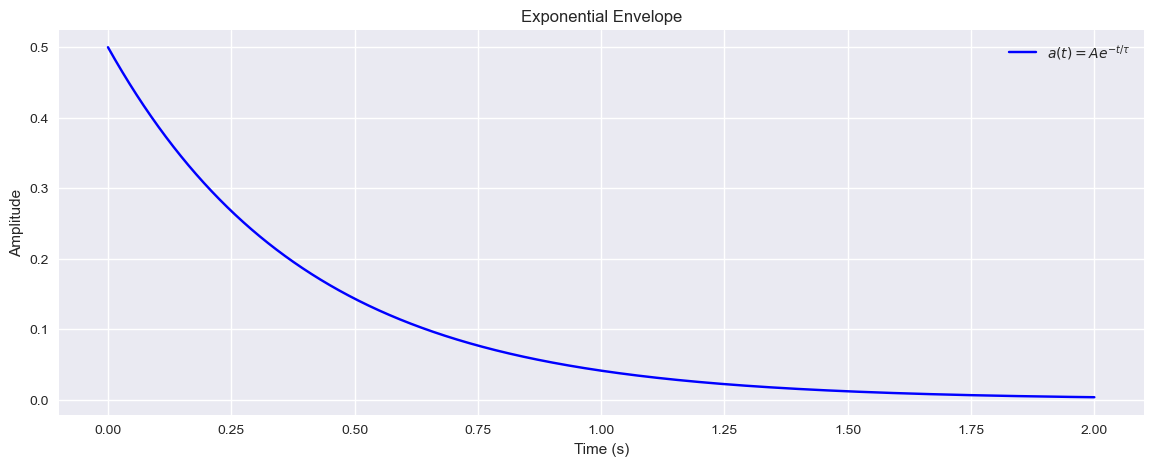

In [51]:
# Create the figure
plt.figure(figsize=(14, 5))

# Plot the envelope
plt.plot(t, a, label=r'$a(t) = A e^{-t/\tau}$', color='blue')

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Exponential Envelope")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

* Generate a sawtooth wave by using ```scipy.signal``` to generates notes with the model

\begin{equation}
  x(t) = a(t) \textrm{sawtooth}(2\pi f_k t)
\end{equation}

where $a(t)$ is the envelope (see above) and $f_k$ the fundamental frequencies of the $k$-th pitch as in the table of Exercise 1.

Generate note signals for pitches A, C#, E and A$_2$:

In [52]:
import scipy.signal
# Define parameters
fs = 16000  # Sampling frequency
t = np.arange(0, 2, 1/fs)  # Time vector
tau = 0.4  # Time constant
A = 0.5  # Amplitude

# Compute the envelope function
a_t = A * np.exp(-t / tau)

# Define fundamental frequencies
frequencies = {
    "A": 440.0,
    "C#": 554.37,
    "E": 659.25,
    "A2": 880.0
}

# Generate sawtooth waves
sawtooth_waves = {note: a_t * scipy.signal.sawtooth(2 * np.pi * f * t)
                  for note, f in frequencies.items()}


* Listen to each of the notes by using ``IPython.display.display(IPython.display.Audio(x, rate=fs))``

In [53]:
import IPython.display as ipd

# Play each generated sawtooth wave
for note, wave in sawtooth_waves.items():
    print(f"Playing: {note}")
    ipd.display(ipd.Audio(wave, rate=fs))

Playing: A


Playing: C#


Playing: E


Playing: A2


* Generate a vector arpegio by concatenating the four notes:

In [54]:
# Concatenate the four notes to create an arpeggio
arpeggio = np.concatenate([sawtooth_waves["A"], sawtooth_waves["C#"], sawtooth_waves["E"], sawtooth_waves["A2"]])

# Play the arpeggio
ipd.display(ipd.Audio(arpeggio, rate=fs))

* Generate a vector chord made by summing up the four notes and dividing
them by 4 to avoid clipping:

In [55]:
# Sum the four notes and normalize to avoid clipping
chord = (sawtooth_waves["A"] + sawtooth_waves["C#"] + sawtooth_waves["E"] + sawtooth_waves["A2"]) / 4

# Play the chord
ipd.display(ipd.Audio(chord, rate=fs))

### **Exercise 3**: STFT Representation

Now let's download a speech signal using the wget command. Then, we are going to read it with using ```librosa.load``` and show its sampling rate and duration.

Note 1: The audio file can be also downloaded and imported into you colab space manually.

Note 2: By default, ```librosa.load``` resample the input signal to 22050Hz. If we want to keep the original sampling frequency, then use ```sr=None```.

In [76]:
!wget -P sample_data/ https://www.voiptroubleshooter.com/open_speech/american/OSR_us_000_0010_8k.wav


--2025-03-05 16:46:18--  https://www.voiptroubleshooter.com/open_speech/american/OSR_us_000_0010_8k.wav
Resolving www.voiptroubleshooter.com (www.voiptroubleshooter.com)... 162.241.218.124
Connecting to www.voiptroubleshooter.com (www.voiptroubleshooter.com)|162.241.218.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 538014 (525K) [audio/x-wav]
Saving to: 'sample_data/OSR_us_000_0010_8k.wav.1'

     0K .......... .......... .......... .......... ..........  9%  164K 3s
    50K .......... .......... .......... .......... .......... 19%  340K 2s
   100K .......... .......... .......... .......... .......... 28%  166K 2s
   150K .......... .......... .......... .......... .......... 38%  273K 2s
   200K .......... .......... .......... .......... .......... 47%  184K 1s
   250K .......... .......... .......... .......... .......... 57%  111K 1s
   300K .......... .......... .......... .......... .......... 66%  155K 1s
   350K .......... .......... ..........

In [79]:
import librosa

file_path = "sample_data/OSR_us_000_0010_8k.wav"

# Load the file with librosa
signal, sample_rate = librosa.load(file_path, sr=None)

# Print info
print(f"Sample rate: {sample_rate} Hz")
print(f"Signal duration: {len(signal)/sample_rate:.6f} seconds")




Sample rate: 8000 Hz
Signal duration: 33.623125 seconds


Expected output:
```
Sample rate:  8000
Signal duration 33.623125
```

### Taks:
* Cut the signal to show only the third spoken sentence (from t=7 s to t = 10 s). Represent it with respect to time in seconds.

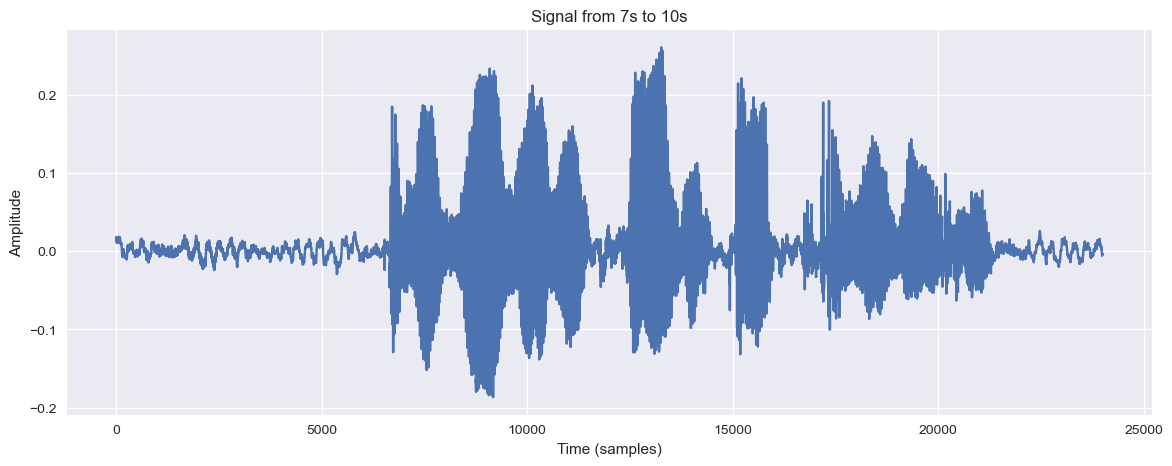

In [82]:

# Define the start and end time (in seconds)
start_time = 7  # start at 7 seconds
end_time = 10   # end at 10 seconds

# Convert the times to sample indices
start_sample = int(start_time * sample_rate)
end_sample = int(end_time * sample_rate)

# Slice the signal to get the third sentence
signal_slice = signal[start_sample:end_sample]

# Create the plot
plt.figure(figsize=(14, 5))
plt.plot(signal_slice)
plt.title("Signal from 7s to 10s")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


* Now listen to the selected audio segment:

In [85]:

# Play the selected segment
display(Audio(signal_slice, rate=sample_rate))


Create a function "enframe" that takes as input:

*   signal (one-dimensional)
*   frame length (in samples)
*   hop size (in samples)

and returns a matrix where each column stores a frame of the signal. The function should pad the signal with zeroes if necessary.

Here is the pseudocode:



```
FUNCTION enframe(signal, frame_length, hop_size)
    INPUT:
        signal: Array containing the audio signal samples
        frame_length: Integer, the number of samples per frame
        hop_size: Integer, the number of samples to step between frames
    OUTPUT:
        frames: 2D Array where each row is a frame of the signal

    INITIALIZE empty list frames

    CALCULATE total_frames = CEIL((length of signal - frame_length) / hop_size) + 1

    CALCULATE padding_needed = (total_frames - 1) * hop_size + frame_length - length of signal

    IF padding_needed > 0 THEN
        APPEND padding_needed zeros to signal

    FOR i FROM 0 TO total_frames - 1
        START_INDEX = i * hop_size
        END_INDEX = START_INDEX + frame_length

        APPEND signal[START_INDEX:END_INDEX] TO frames

    RETURN frames
END FUNCTION
```

In [91]:
import numpy as np

def enframe(signal, frame_length, hop_size):
    # Initialize empty list to store frames
    frames = []

    # Calculate the total number of frames
    total_frames = int(np.ceil((len(signal) - frame_length) / hop_size)) + 1

    # Calculate the padding needed
    padding_needed = (total_frames - 1) * hop_size + frame_length - len(signal)

    # Pad the signal with zeros if necessary
    if padding_needed > 0:
        signal = np.pad(signal, (0, padding_needed), mode='constant')

    # Loop over each frame and extract the corresponding portion of the signal
    for i in range(total_frames):
        start_index = i * hop_size
        end_index = start_index + frame_length
        frames.append(signal[start_index:end_index])

    # Return the frames as a 2D array
    return np.array(frames)

* Divide the signal into frames of length 512, using a hop size of 256 samples. Show the dimensions of the output.

In [93]:
# Define frame length and hop size
frame_length = 512
hop_size = 256

# Divide the signal into frames
frames = enframe(signal_slice, frame_length, hop_size)

# Show the dimensions of the output
print(f"Dimensions of the output: {frames.shape}")


Dimensions of the output: (93, 512)


Expected output:
```
shape = (512, 93)
```

* Plot the content of the 10-th frame:

In [ ]:
plt.figure(figsize=(14,5))
# Add your code here!
#...

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

* Create a Hamming function and apply it to each of your frames:

In [ ]:
# Add your code here!
# winfunc = np.hamming(frame_length)
#...

* Plot again the 10-th frame after having applied your Hamming window:

In [ ]:
plt.figure(figsize=(14,5))
# Add your code here!
#...

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

* Compute the DFT of each column (frame) using numpy's ```rfft()``` function. Use as number of FFT points the same value as window length.

In [ ]:
NFFT = frame_length
# Add your code here!
#...

* Use the following function to represent the result with the indices of each frame and each frequency bin in the horizontal and vertical axes, respectively.



In [ ]:
def show_specgram(X,ratio,limits,cmin):
  '''This function represents matrix X within a figure having the desired
  aspect ratio.
  Input:
    - X: matrix to represent
    - ratio: aspect ratio of axes
    - limits: array with [xmin, xmax, ymax, ymin] (y axis is reversed)
    - cmin: minimum value corresponding to the bottom of the colormap scale.
  Output:
    - figure handle
  '''
  w, h = plt.figaspect(ratio);
  fig = plt.figure(figsize=(w*2, h*2))
  ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
  im = ax.imshow(X, extent = limits, cmap='viridis', interpolation='none')
  xleft, xright = ax.get_xlim()
  ybottom, ytop = ax.get_ylim()
  ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
  ax.invert_yaxis()
  if cmin != None:
    cbar = plt.colorbar(im)
    cbar.mappable.set_clim(cmin, None)
  return ax

* Now let's use the function ```show_spectrogram```to display the log power spectrogram ```(10*np.log10(np.abs(X)**2)``.

Note: User parameters ratio=0.7 and  cmin=-50

In [ ]:
# Add your code here!
# ax = show_specgram(...
# ...

* Finally, represent again the spectrogram but as a function of the time in seconds and frequency in Hz.

In [ ]:
# Add your code here!
# f_bins = ...
# time_seconds = ...
# ax = show_specgram(...

### **Exercise 4**: Librosa representations (STFT)

Let's first check the librosa documentation: https://librosa.org/doc/main/generated/librosa.stft.html?highlight=stft#librosa-stft

The most important parameters are:
  - **win_length** - this is the size of our analysis window (in samples)
  - **hop_length** - this is the hop size of our analysis window (in samples), usually this is chosen to be half the window size
  - (**n_fft**) - this is the used "FFT size", which can be bigger than the **win_length** (but should be a power of two, such that the Fast Fourier Transform (FFT) algorithm can be used internally)
  

### Tasks:
* Use librosa to represent the power spectrogram of the signal, as we computed manually in the last exercise.

In [ ]:
# Add your code here!
# X = librosa.stft(...
# X_pow_db = librosa.power_to_db(np.abs(X)**2)

# w, h = plt.figaspect(0.7);
# plt.figure(figsize=(w*2,h*2));
# librosa.display.specshow(...

* Experiment with different values of frame length and hop size and discuss the results.

In [ ]:
# Add your code here!
# frame_length = ...
# hop_size = ...
# ...

**Case 1 - Decrease the frame length and hop size to 1/4 of the original value**

WRITE YOUR CONCLUSIONS HERE!

**Case 2 - Increase the frame length and hop size to x2 of the original values**

WRITE YOUR CONCLUSIONS HERE!

**Case 3 - Increasing the frame length and decreasing the overlapping of frames simultaneously**

WRITE YOUR CONCLUSIONS HERE!

### **Exercise 5**: Mel-Spectrograms

Let's first check the librosa documentation: https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html

The most important parameters are 
  - **y** - audio sample vector ($x$)
  - **sr** - sampling rate of the audio signal (in Hz)
  - **n_mels** - number of Mel frequency bands (commonly: 64 or 128)
  - **win_length** - see above (STFT)
  - **hop_length** - see above (STFT)
  - **n_fft** - see above (STFT)

### Tasks:
* Compute the mel spectrogram using librosa. Experiment with different values of the parameters and discuss the results.

**Case 1 - Setting number of Mel bands to be generated as 40**

Take 40 mel bands is a typical number used as a best practice.

In [ ]:
# Add your code here!
# reseting original values of frame length and hop size
# frame_length = ...
# hop_size = ...
# n_mels = ...
# 
# X_mel = librosa.feature.melspectrogram(...

plt.figure(figsize=(15,8));
librosa.display.specshow(librosa.power_to_db(X_mel), sr=sample_rate, hop_length=hop_size, x_axis='time', y_axis='mel', fmax=sample_rate/2, cmap='viridis');
plt.clim(-40,None);
plt.colorbar();
plt.title('Mel-scale Spectrogram (Librosa) - 40 Mel Filters');

NameError: name 'X_mel' is not defined

<Figure size 1500x800 with 0 Axes>

**Case 2 - Decreasing number of Mel bands to 10**

In [ ]:
# Add your code here!
# n_mels = 10
# X_mel = ...

WRITE YOUR CONCLUSIONS HERE!

### Now let's perform a similar analysis with a music signal ("oboe_c6.wav").


In [ ]:
# !wget -P sample_data/ https://ccrma.stanford.edu/workshops/dsp2008/sound-library/oboe/Oboe1/Oboe-C6.wav

oboeC6 , sr = librosa.load('./content/sample_data/Oboe-C6.wav', sr=None)
IPython.display.display(IPython.display.Audio(oboeC6, rate=sr))


**Case 1 - Setting number of Mel bands to be generated as 40**

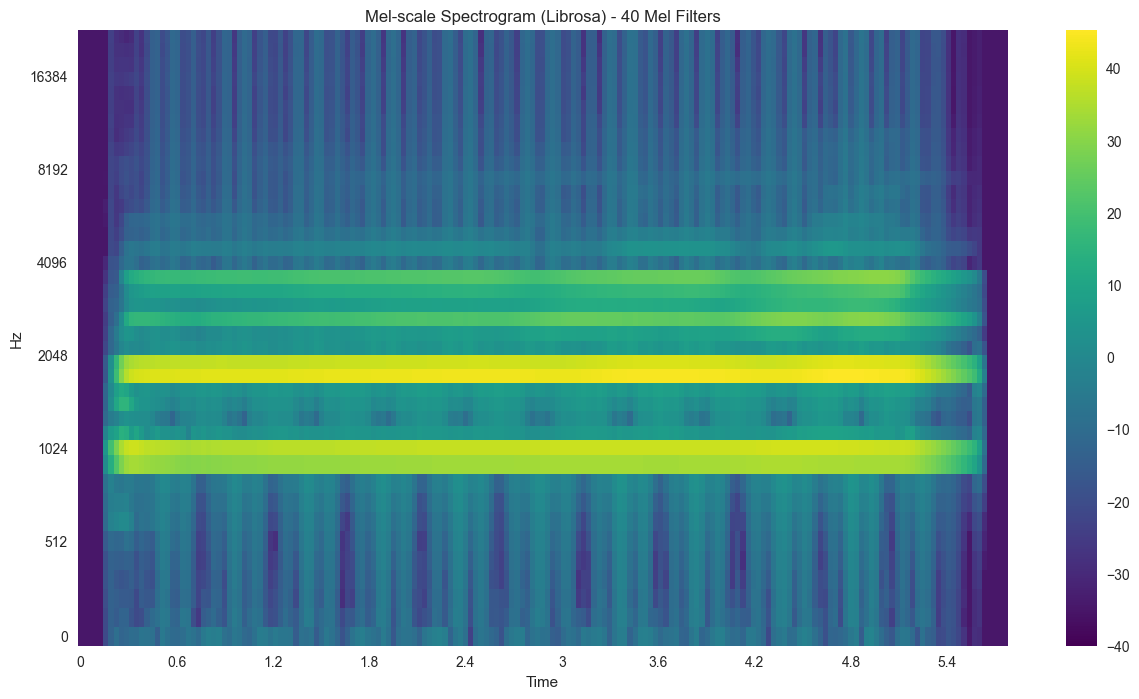

In [ ]:
# Your code here!
# ...
# X_ob_mel = librosa.feature.melspectrogram(...
# ...
# plt.figure(figsize=(15,8));
# librosa.display.specshow(...

**Case 2 - Decreasing number of Mel bands to 10**

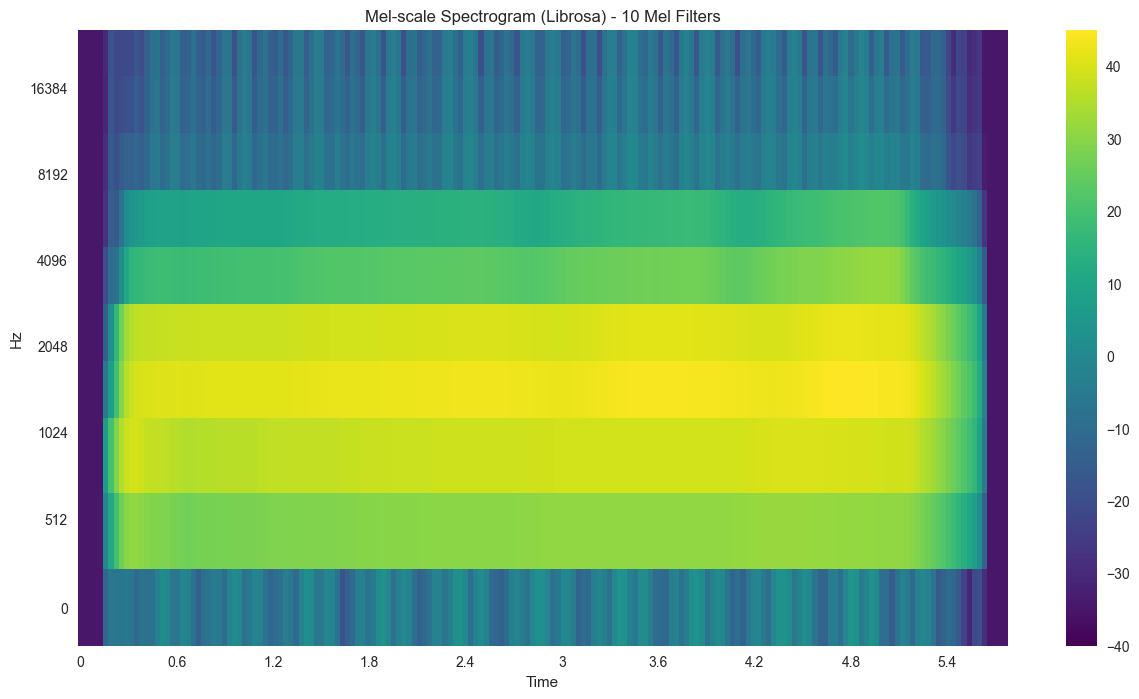

In [ ]:
# Your code here!

* Oboe analysis:

WRITE YOUR CONCLUSIONS HERE!

### **Exercise 6**: Constant-Q Transform

Let's first check the librosa documentation: https://librosa.org/doc/main/generated/librosa.cqt.html

The most important parameters are 
  - **y** - audio sample vector ($x$)
  - **sr** - sampling rate of the audio signal (in Hz)
  - **hop_length** - see above (STFT)
  - **f_min** - minimum frequency (we can use the default value of 32.70 Hz which corresponds to the note C1)
  - **n_bins** - total number of frequency bins (e.g., for a frequency resolution of one bin per semitone and 4 octaves, this would be 4 * 12 = 48)
  - **bins_per_octave** - Logarithmic frequency resolution (frequency bins per octave, commonly: 12 or 36)
  - **tuning** - Tuning offset (can be used if known tuning frequency of an audio recording deviates from 440 Hz) 

HINTS:

```Num of Octaves = n_bins / bins_per_octave```

```Max Frequency = fmin * 2**() n_bins / bins_per_octave```
  

### Tasks:
* Compute the constant Q transform using librosa.
Experiment with different values of the parameters and discuss the results.

**Case 1 - The default librosa.display.specshow parameter values.**

In [ ]:
# Add your code here!
# x, sr = librosa.load(...
# C = librosa.cqt(...
# logC = librosa.amplitude_to_db(
plt.figure(figsize=(15,8));
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', cmap='viridis');
plt.xlabel('Time [s]');
plt.title('Constant-Q Transform Power Specturm');

**Case 2 - Limit the frequency range (fmin=Hz(C5)) -  increasing `bins_per_octave` to 24 **

In [ ]:
# Your code here
# fmin=librosa.note_to_hz('C5')
# ...

**Case 3 - Limit the frequency range (fmin=Hz(C5))- decrease the `n_bins` to 53 **

In [ ]:
# Your code here
# fmin=librosa.note_to_hz('C5')
# ...

* CQT Analysis

WRITE YOUR CONCLUSIONS HERE!

### **Exercise 7**: MFCCs

Let's first check the librosa documentation: https://librosa.org/doc/latest/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

The most important parameters are 
  - **y** - audio sample vector ($x$)
  - **sr** - sampling rate of the audio signal (in Hz)
  - **n_fft** - see above (STFT)
  - **hop_length** - see above (STFT)
  - **n_mfcc** - Number of MFC coefficients  

### Tasks:
* Compute MFCCs using librosa. Experiment with different values of the parameters and discuss the results.

**Case 1 - Using the standard librosa.feature.mfcc function on the audio file OSR_us_000_0010_8k.wav (seconds 7 to 10)**

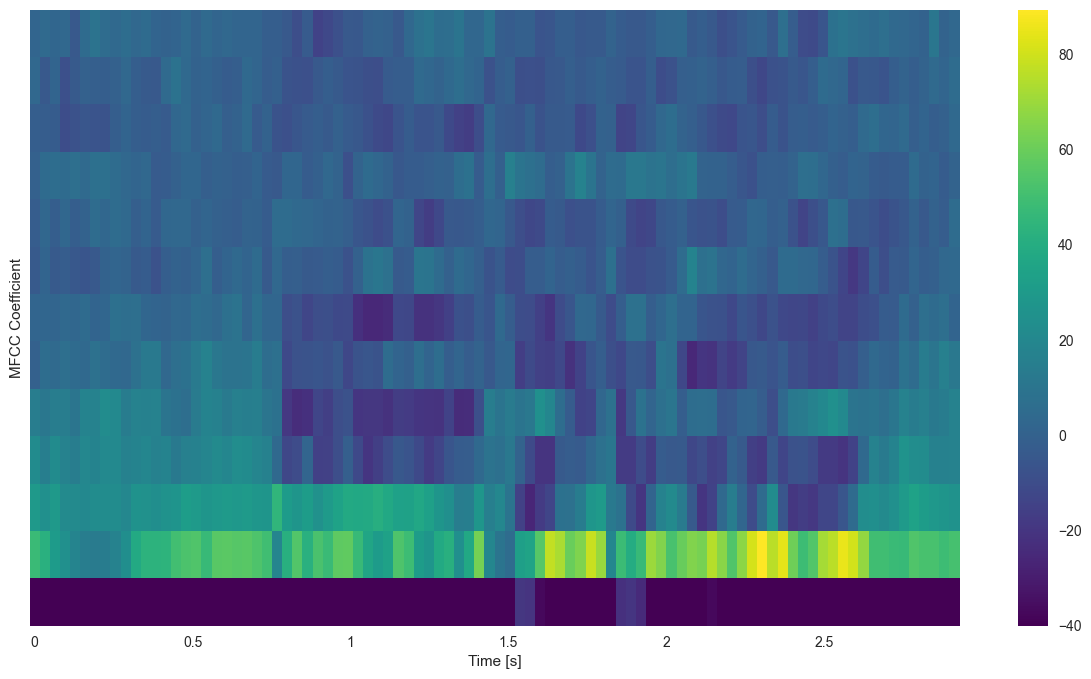

In [ ]:
# Add your code here!
# signal, sample_rate = librosa.load(...
# ...

plt.figure(figsize=(15,8));
librosa.display.specshow(X_mfcc, sr=sample_rate, hop_length=hop_length, x_axis='time', cmap='viridis');
plt.clim(-40,None);
plt.colorbar();
plt.xlabel('Time [s]');
plt.ylabel('MFCC Coefficient');

**Case 2 - Increasing the number of components to 40**



In [ ]:
# Add your code here!
# num_ceps =40
# ...

* WRITE YOUR CONCLUSIONS HERE!

**Case 3 - Changing the coefficient weighting parameter `lifter` to the number of 2 x number of cepstral coefficients**


In [ ]:
# Add your code here!
# num_ceps = 40
# lifter = 2*num_ceps

* WRITE YOUR CONCLUSIONS HERE!

**Case 4 - Comparing the oboe_c6.wav audio and simple_piano.wav sound**

In [ ]:
# !wget -P sample_data/ https://ccrma.stanford.edu/workshops/dsp2008/sound-library/piano/YamahaH/YamahaH-C6.wav
# Add your code here!
# ...

* WRITE YOUR CONCLUSIONS HERE!